In [1]:
# Setup & Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Load both files
df_exercise = pd.read_csv('../data/exercise.csv')
df_calories = pd.read_csv('../data/calories.csv')

# Merge by index
df = pd.concat([df_exercise, df_calories['Calories']], axis=1)

df.head()



,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [3]:
# Encode Gender (Male = 1, Female = 0)
df['Gender'] = df['Gender'].map({'male': 1, 'female': 0})

# Select features for Heart Rate prediction
features_hr = ['Gender', 'Age', 'Height', 'Weight', 'Duration']
X_hr = df[features_hr]
y_hr = df['Heart_Rate']


In [ ]:
# Train Model
X_train_hr, X_test_hr, y_train_hr, y_test_hr = train_test_split(X_hr, y_hr, test_size=0.2, random_state=42)

model_hr = LinearRegression()
model_hr.fit(X_train_hr, y_train_hr)

# Predict
y_pred_hr = model_hr.predict(X_test_hr)


Heart Rate Prediction - Linear Regression
R² Score: 0.7357173702544111
MAE: 4.022083659000314
RMSE: 5.012790258036366


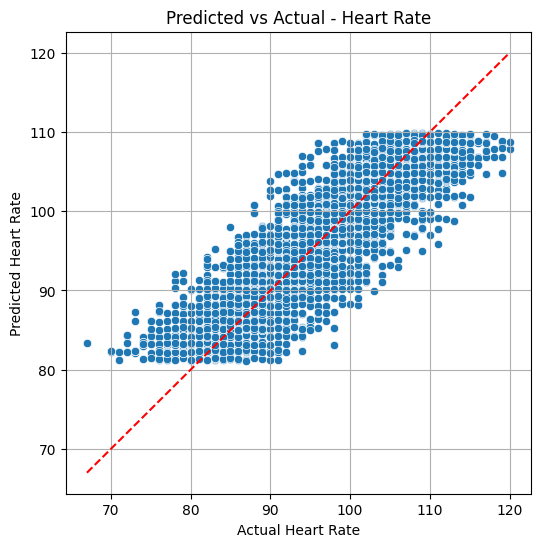

In [9]:
# Evaluate Heart Rate Model
print("Heart Rate Prediction - Linear Regression")
print("R² Score:", r2_score(y_test_hr, y_pred_hr))
print("MAE:", mean_absolute_error(y_test_hr, y_pred_hr))
print("RMSE:", np.sqrt(mean_squared_error(y_test_hr, y_pred_hr)))

# Plot
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test_hr, y=y_pred_hr)
plt.xlabel("Actual Heart Rate")
plt.ylabel("Predicted Heart Rate")
plt.title("Predicted vs Actual - Heart Rate")
plt.plot([y_test_hr.min(), y_test_hr.max()], [y_test_hr.min(), y_test_hr.max()], 'r--')
plt.grid()
plt.show()


### **Heart Rate Prediction – Linear Regression Results**
#### **Model Evaluation Metrics:**

**R² Score:** 0.736

  - The model explains approximately 73.6% of the variance in heart rate, indicating a fairly strong linear relationship.

**Mean Absolute Error (MAE):** 4.02 bpm

  - On average, the predicted heart rate is about 4 beats per minute off from the actual value.

**Root Mean Squared Error (RMSE):** 5.01 bpm

  - Larger errors are slightly penalized more, but this value is still within a reasonable range for physiological prediction.

#### **Visual Interpretation:**

  - The scatter plot compares predicted heart rate (y-axis) vs. actual heart rate (x-axis).

  - The red dashed line represents the ideal line where predicted = actual.

  - Points tightly clustered around this line reflect good predictions, while deviations represent prediction errors.

  - There’s a slight underestimation trend for higher actual values (above ~100 bpm), suggesting potential model bias at higher intensities.



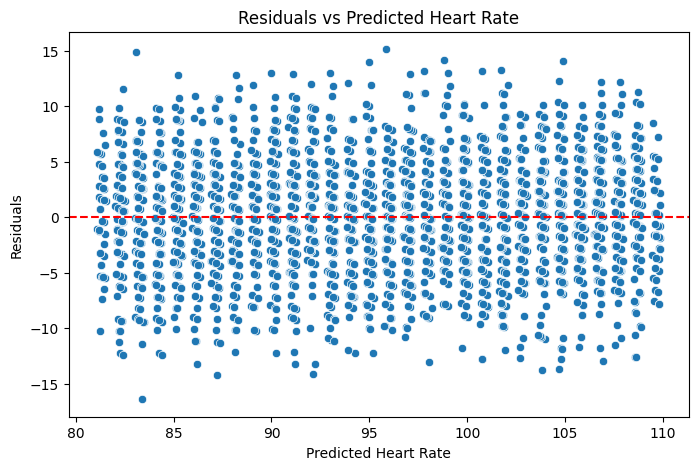

In [12]:
# Inspect Residuals

residuals = y_test_hr - y_pred_hr

# 1. Residuals vs Predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_hr, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Heart Rate')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Heart Rate')
plt.show()



### **Residuals Analysis**

#### **What this plot shows:**

  - The x-axis represents predicted heart rate values from the linear regression model.

  - The y-axis represents residuals — the difference between actual and predicted values (residual = actual - predicted).

  - The red dashed line at y = 0 represents perfect predictions (no error).

**Interpretation:**

  - The residuals are randomly scattered around zero with no clear trend or curvature — a good sign for linear regression.

  - There is no funnel shape, which means variance in errors is minimal.

  - The distribution is relatively symmetrical, suggesting errors are approximately normally distributed — another positive sign.

  - There are a few outliers (residuals above ±15 bpm), but they are sparse and do not heavily distort the overall pattern.

**Conclusion:**

  - This plot confirms that linear regression is a reasonable fit for this data.


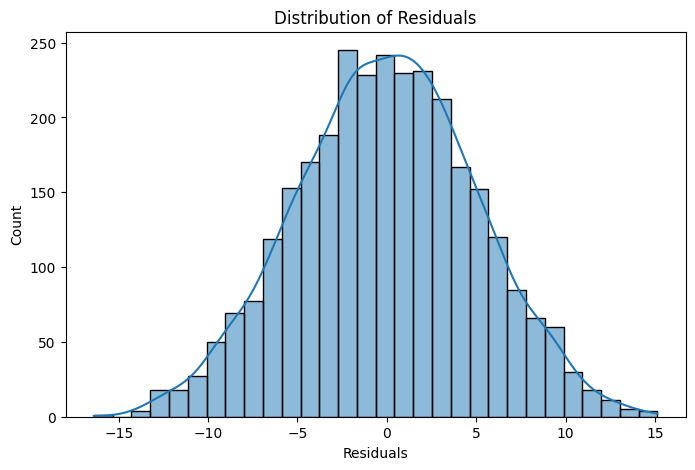

In [13]:
# 2. Histogram of Residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()


### **Residual Distribution**
**Interpretation:**

  - The distribution is approximately normal (Gaussian), centered around zero.

  - This confirms a key assumption of linear regression — that errors are normally distributed.

  - There is slight left skewness (a few more negative residuals), but not severe.

  - Most residuals fall within ±10 bpm, indicating reasonably tight predictions.

**Conclusion:**

  - The model’s residuals pass the normality check well.

  - This supports the validity of the regression assumptions, especially for inference (e.g., confidence intervals, hypothesis testing).